
importing library


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data training preprocessing

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/training',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False
)


Found 10817 files belonging to 2 classes.


In [16]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/validation',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
    follow_links=False
)


Found 2703 files belonging to 2 classes.


validation image preprocesssing


In [17]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
#for x,y in training_set:
    #print(x,x.shape)
    #print(y,y.shape)
#break

building model

In [19]:
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential
from keras.layers import MaxPool2D,Flatten
from tensorflow.keras.layers import Dropout


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, GlobalAveragePooling2D

# Model Definition
model = Sequential()

# First Conv Block
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Second Conv Block
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Third Conv Block
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

# Fully Connected Layers
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())  # ✅ Replaces Flatten() for lower memory use
model.add(Dense(512, activation='relu'))  # ✅ Reduced from 1500 to 512
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))  # ✅ Softmax is fine for two-class classification

# Model Compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # Use 'binary_crossentropy' if using one-hot labels
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                  

building convolution layer


training model


In [ ]:
training_history_n=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
80/85 [===========================>..] - ETA: 18s - loss: 0.8388 - accuracy: 0.5324 

model evaluation of training set

In [9]:
# Evaluate  the training set
train_loss, train_acc = model.evaluate(training_set)

# Evaluate on the validation set (optional)
val_loss, val_acc = model.evaluate(validation_set)

# Print results
print(f"Training Loss: {train_loss}, Training Accuracy: {train_acc}")
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")


339/339 ━━━━━━━━━━━━━━━━━━━━ 179s 528ms/step - accuracy: 0.9141 - loss: 0.2508
85/85 ━━━━━━━━━━━━━━━━━━━━ 44s 519ms/step - accuracy: 0.9049 - loss: 0.2706
Training Loss: 0.25412246584892273, Training Accuracy: 0.9121752977371216
Validation Loss: 0.29137593507766724, Validation Accuracy: 0.8964114189147949


saving model

In [8]:
model.save("trainnew_modell.keras")

In [9]:
training_history_n.history

NameError: name 'training_history_new' is not defined

In [10]:
#recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history_n.history,f)


NameError: name 'training_history_new' is not defined

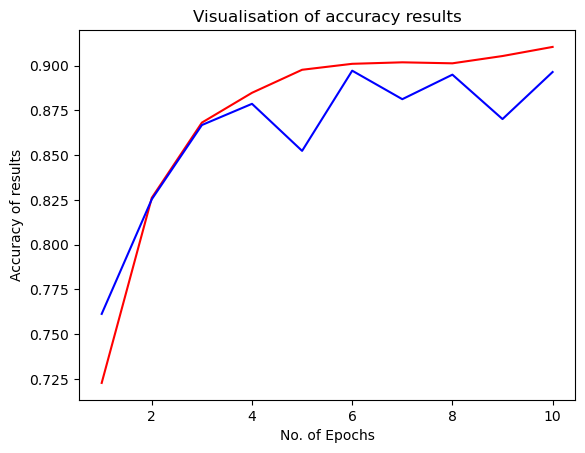

In [13]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history_n.history['accuracy'],color='red', label='Training accuracy')
plt.plot(epochs,training_history_n.history['val_accuracy'],color='blue',label='Validation accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy of results")
plt.title("Visualisation of accuracy results")
plt.show()

In [11]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'DataSet2/data_split/validation',
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    interpolation="bilinear",
    follow_links=False
)


Found 2703 files belonging to 2 classes.


In [12]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

85/85 ━━━━━━━━━━━━━━━━━━━━ 48s 563ms/step


(array([[0.02485076, 0.9751492 ],
        [0.00906846, 0.9909315 ],
        [0.09055375, 0.9094463 ],
        ...,
        [0.02643886, 0.97356117],
        [0.02479431, 0.97520566],
        [0.02955613, 0.97044384]], dtype=float32),
 (2703, 2))

In [13]:
predicted_categories =tf.argmax(y_pred,axis=1)
y_pred,y_pred.shape

(array([[0.02485076, 0.9751492 ],
        [0.00906846, 0.9909315 ],
        [0.09055375, 0.9094463 ],
        ...,
        [0.02643886, 0.97356117],
        [0.02479431, 0.97520566],
        [0.02955613, 0.97044384]], dtype=float32),
 (2703, 2))

In [1]:
predicted_categories

NameError: name 'predicted_categories' is not defined

In [2]:
true_categories = tf.concat([y for x,y in test_set],axis=0)

NameError: name 'tf' is not defined

In [3]:
true_categories

NameError: name 'true_categories' is not defined

In [4]:
Y_true = true_categories  # No need for tf.argmax()
print(Y_true)


NameError: name 'true_categories' is not defined

In [5]:
print(true_categories.shape)  # Debugging step


NameError: name 'true_categories' is not defined

In [6]:
from sklearn.metrics import classification_report , confusion_matrix

# Define class names (replace with your actual class labels)
class_name = ['healthy', 'unhealthy']  # Example: Modify based on your dataset

# Generate the classification report
print(classification_report(Y_true, predicted_categories, target_names=class_name))


NameError: name 'Y_true' is not defined

In [ ]:
cm= confusion_matrix(Y_true, predicted_categories)
cm

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example usage:
# Assuming Y_true and predicted_categories are defined
cm = confusion_matrix(Y_true, predicted_categories)

# Plot heatmap
plt.figure(figsize=(4, 4))  # Create figure first
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # Save the axes to a variable

# Labels and title
ax.set_xlabel("Predicted Class")
ax.set_ylabel("Actual Class")
ax.set_title("Healthy Unhealthy Confusion Matrix")

plt.show()


NameError: name 'Y_true' is not defined

In [ ]:
model.save("trainnew_model.keras")


In [ ]:
model.save("trainnew_model.h5")

In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0
